In [ ]:
%pip install -Uqq fastbook

In [1]:
from fastbook import *
from fastai.vision.widgets import *
import os

In [2]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [3]:
if not path.exists():
    path.mkdir(parents=True)
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls = results)

In [4]:
fns = get_image_files(path)
fns

(#538) [Path('bears/black/00a533da-2c0a-4bef-8fbc-47484100bf1a.jpg'),Path('bears/black/028383f3-1009-4040-8a3c-c1ee8b0c3ca3.jpg'),Path('bears/black/05525a9b-758c-4abe-ad9c-9aa8b3581dfb.jpg'),Path('bears/black/071e9e24-b082-4bee-bd1f-ddc8aa3e3979.jpg'),Path('bears/black/07bbbeb3-20d6-4d63-b438-7522306191fd.jpg'),Path('bears/black/0b0ce270-c028-4e16-a1ee-4834a1f048f4.jpg'),Path('bears/black/0b4b1aba-2c1e-4438-bdc4-44077ebda0a7.jpg'),Path('bears/black/0d23cfe3-412e-4d35-a4e3-8ade88aeb6c7.jpg'),Path('bears/black/0d446aef-5096-4129-93fb-a03051082843.JPG'),Path('bears/black/0dab59a2-64c8-4ade-8a95-ea9120256270.jpg'),Path('bears/black/0f602ac6-e7a4-48aa-8c2a-04aefd62271b.jpg'),Path('bears/black/0fac1616-e124-43ff-844e-339397cb2486.jpg'),Path('bears/black/0fb655f1-390c-4c91-ab95-18e486851562.jpg'),Path('bears/black/11a13595-27d7-4d87-83d1-8b18bf995803.jpg'),Path('bears/black/11c4155f-8961-4b8c-8315-6e7fb33a03ad.jpg'),Path('bears/black/132b96f4-c5bc-4bd0-b0f7-bb9361c17550.jpg'),Path('bears/blac

In [5]:
failed = verify_images(fns)
failed

(#26) [Path('bears/black/0d446aef-5096-4129-93fb-a03051082843.JPG'),Path('bears/black/41d6c52c-d5f6-4b64-8c5a-0579084a1958.jpg'),Path('bears/black/53820d97-5223-4601-ae49-1a021972bc61.jpg'),Path('bears/black/57582f26-022b-4f62-9214-ab1186e05ab2.jpg'),Path('bears/black/934f1f0d-c8bd-4c11-83c5-0f4676041564.jpg'),Path('bears/black/9b133c7e-db30-465e-99ca-ddd09c42f1b7.jpg'),Path('bears/black/b8b1511e-0090-49d4-a81b-e81530c95211.jpg'),Path('bears/black/e8115305-d0da-4c52-afd2-88b921903ce6.jpg'),Path('bears/black/f9b1b460-c398-4c16-8a7f-08fb6ee1d661.jpg'),Path('bears/grizzly/0f21668e-d437-444c-a895-6c5372790edb.jpg'),Path('bears/grizzly/148c65a2-4a22-4e94-b7ed-41b4d5446638.JPG'),Path('bears/grizzly/19d50355-4889-4c0b-bbc3-1f9650ebc2df.jpg'),Path('bears/grizzly/33be0103-82de-4b60-bb36-85e15850b65a.JPG'),Path('bears/grizzly/3cba601b-0518-4e6f-b595-ceef2a9d926f.jpg'),Path('bears/grizzly/706a7783-411d-4410-8e6f-9a8bb15a5a6f.jpg'),Path('bears/grizzly/a7dd67ea-648f-4a6b-9c45-822fc9e34bd5.jpg'),Pat

In [6]:
failed.map(Path.unlink);

In [7]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [8]:
dls = bears.dataloaders(path)

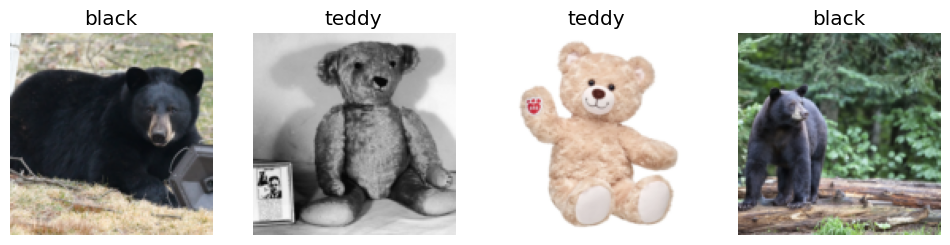

In [9]:
dls.valid.show_batch(max_n=4, nrows=1)

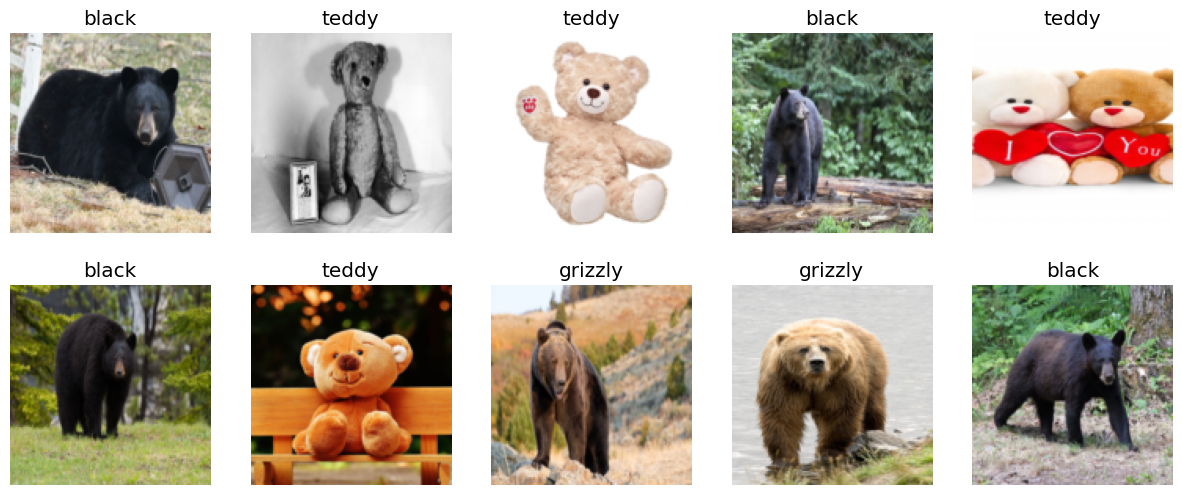

In [10]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=2)

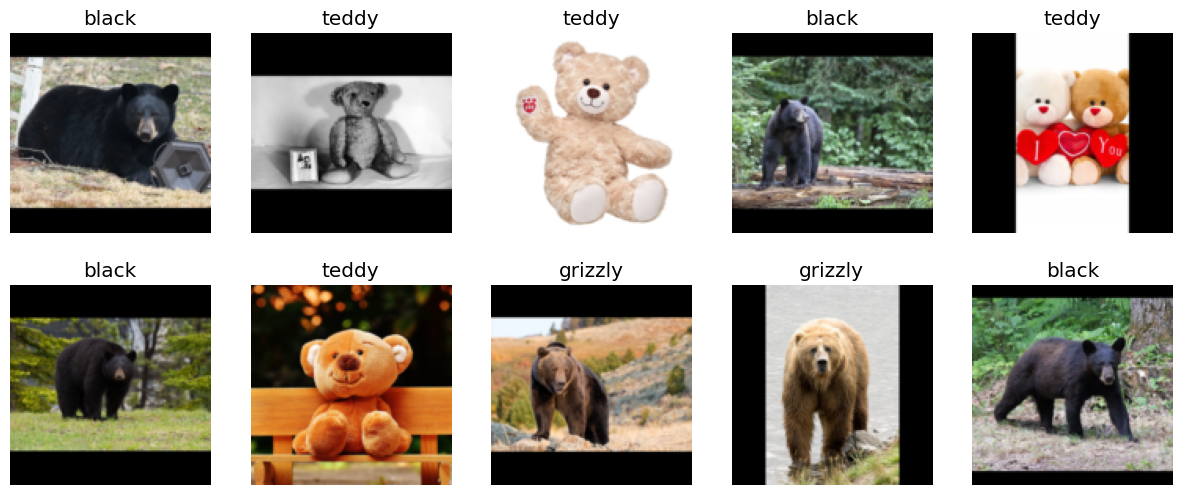

In [11]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=2)

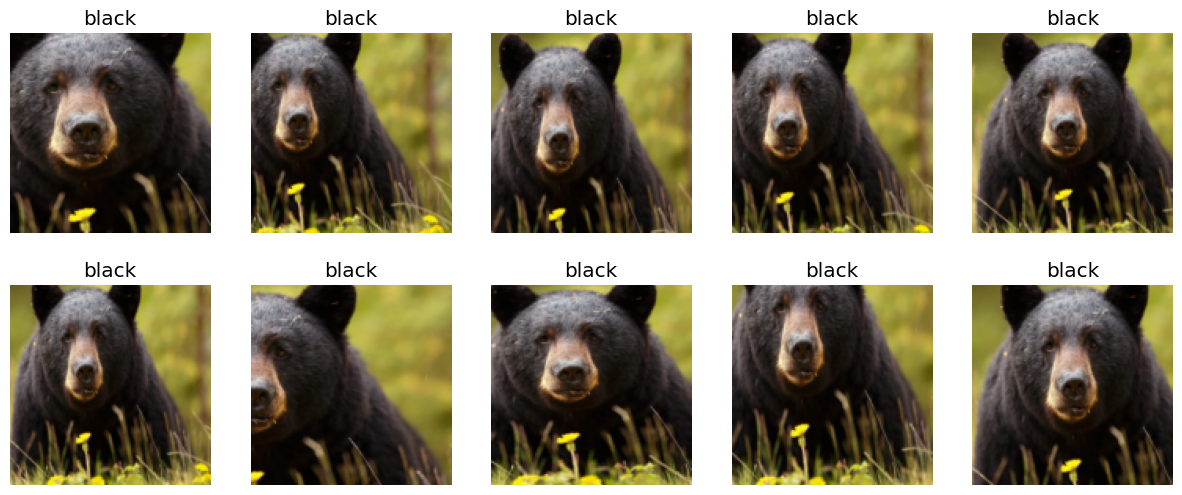

In [12]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=10, nrows=2, unique=True)

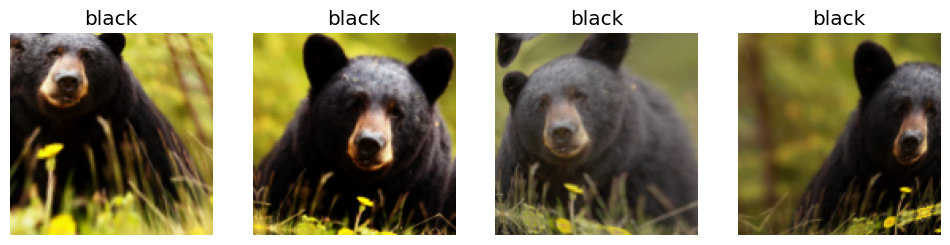

In [13]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [14]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [15]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\User/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:02<00:00, 22.2MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.211295,0.122162,0.039216,00:23


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.218499,0.119293,0.039216,00:27
1,0.178944,0.103940,0.039216,00:26
2,0.141780,0.123863,0.019608,00:28
3,0.111911,0.117556,0.019608,00:25


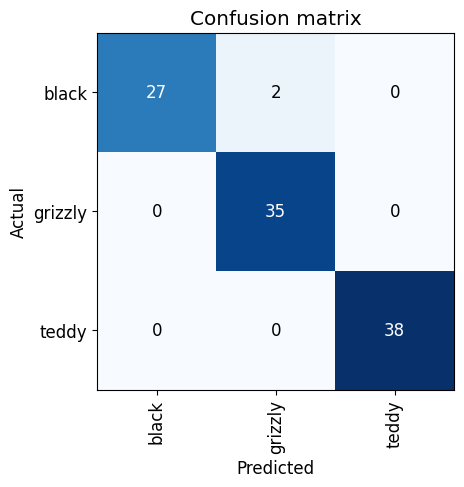

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

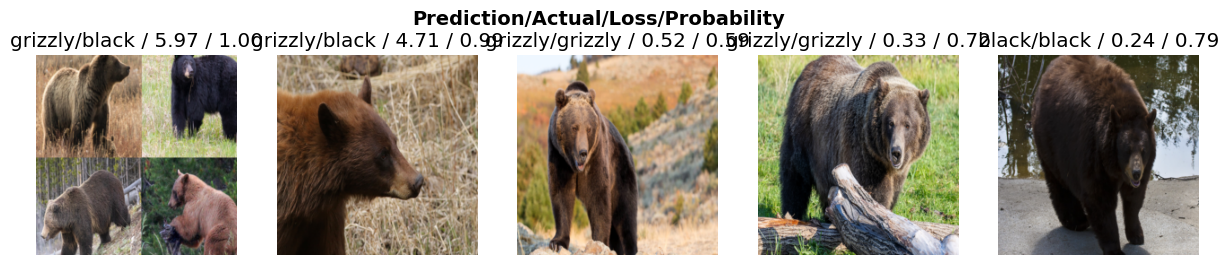

In [17]:
interp.plot_top_losses(5, nrows=1)

In [18]:
from fastai.vision.widgets import *

In [19]:
cleaner = ImageClassifierCleaner(learn)
cleaner

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
learn.export()

In [21]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [22]:
learn_inf = load_learner(path/'export.pkl')

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
